In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [15]:
files = [
        #'./data/results_col8_inner_bottom_processed.root',
        #"./data/results_col8_inner_top_processed.root",
        #"./data/results_col8_outer_top_processed.root",
        #"./data/results_col8_outer_bottom_processed.root"
        "./data/col8_outer_bottom_processed.root", 
        "./data/col8_outer_top_processed.root",
        "./data/col8_inner_bottom_processed.root", 
        "./data/col6_outer_bottom_processed.root",
        "./data/col6_outer_top_processed.root",
        "./data/col6_inner_bottom_processed.root",
        "./data/col6_inner_top_processed.root"
        ]

names = [x.split("/data/")[1].split(".root")[0] for x in files]
print(names)

['col_6_inner_top', 'col_6_inner_bottom', 'col_6_outer_top', 'col_6_outer_bottom', 'col_8_inner_top', 'col_8_inner_bottom', 'col_8_outer_top']


In [16]:
f = [r.TFile(x) for x in files]
print(f)

[<ROOT.TFile object ("./data/col_6_inner_top.root") at 0x7ff7f86d3250>, <ROOT.TFile object ("./data/col_6_inner_bottom.root") at 0x7ff7eb457230>, <ROOT.TFile object ("./data/col_6_outer_top.root") at 0x7ff7eb4577b0>, <ROOT.TFile object ("./data/col_6_outer_bottom.root") at 0x7ff7eb582800>, <ROOT.TFile object ("./data/col_8_inner_top.root") at 0x7ff7eb456e10>, <ROOT.TFile object ("./data/col_8_inner_bottom.root") at 0x7ff7eb584a60>, <ROOT.TFile object ("./data/col_8_outer_top.root") at 0x7ff7eb58a330>]


In [17]:
f[0].ls()

TFile**		./data/col_6_inner_top.root	
 TFile*		./data/col_6_inner_top.root	
  KEY: TDirectoryFile	simuTreeMaker;1	simuTreeMaker (SimuTreeMaker) folder
  KEY: TDirectoryFile	trajectoryAnalyzer;1	trajectoryAnalyzer (TrajectoryAnalyzer) folder


In [19]:
c = r.TCanvas("c","c",2000,1500)
c.Divide(2,2)
for i, fi in enumerate(f):
    c.cd(i+1)
    hi = fi.Get("collimatorHits").Project3D("zy").Clone()
    hi.SetTitle(names[i])
    hi.GetXaxis().SetRangeUser(7112-55, 7112+55)
    hi.GetYaxis().SetRangeUser(-55, +55)
    hi.DrawCopy("colz")
    r.gPad.SetLogz()
c.Draw()

AttributeError: 'TObject' object has no attribute 'Project3D'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


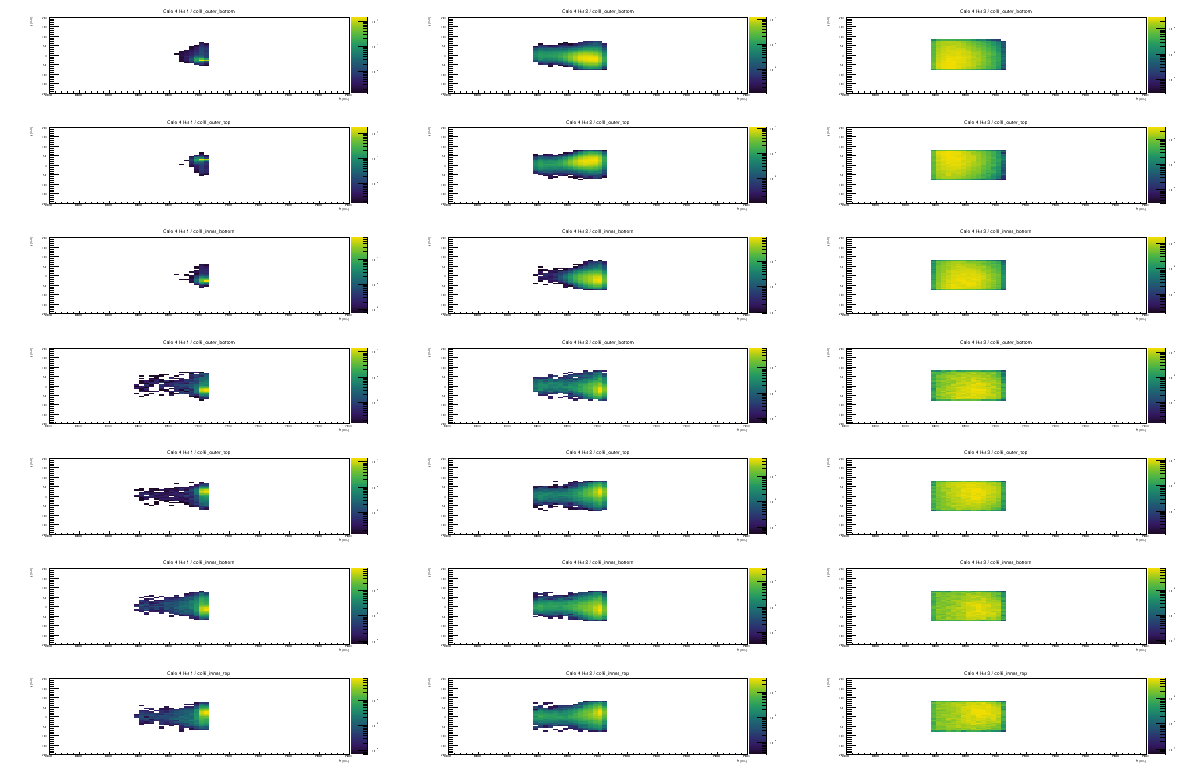

In [7]:
c = r.TCanvas("c","c",1200,800)
c.Divide(3, len(f))
i = 1
calo = 4

means = [[] for i in range(len(f))]

for j, fi in enumerate(f):
    #name = files[j].split("/")[2].split("_pro")[0]
    name = names[j]
    for triple in range(3):
        c.cd(i)
        hi = fi.Get("calo_"+str(calo)+"_tripleHit_"+str(triple+1)).Clone()
        hi.SetTitle("Calo "+str(calo)+" Hit "+str(triple+1)+" / "+name)
        means[j].append((hi.GetMean(1), hi.GetMean(11), hi.GetMean(2), hi.GetMean(12)))
        hi.DrawCopy("colz")
        r.gPad.SetLogz()
        i += 1
c.Draw()

[[(7007.700460655406, 0.05866908578392873, -23.573384716121403, 0.05235872865368739), (6953.826063637234, 0.135733208680279, -16.583782912839617, 0.06373539286694403), (6877.577653133888, 0.17121892459766622, -7.966231782673396, 0.13627956947180547)], [(7008.934208891761, 0.06151967443394162, 25.0002614778484, 0.04909749698607058), (6954.388738907781, 0.17441726424082055, 16.901415928203388, 0.08039305265010827), (6876.222687340351, 0.20302299442772648, 8.1879915685721, 0.16177440695149076)], [(7013.937107129775, 0.07891974294887832, -25.192906282081736, 0.06280373035475174), (6983.001622419751, 0.13194168119803668, -18.95840218048582, 0.09785665272695908), (6899.6146048175315, 0.22486580857256738, -7.690933957893738, 0.1688080828512604)], [(7008.743556694475, 0.3703612344536564, -18.449253821327144, 0.24773976825124971), (6975.465646353765, 0.5791256988053911, -13.617201309832895, 0.2723891230493695), (6912.527736941999, 0.4759560426920993, -6.773991649061509, 0.33896042420043315)], [

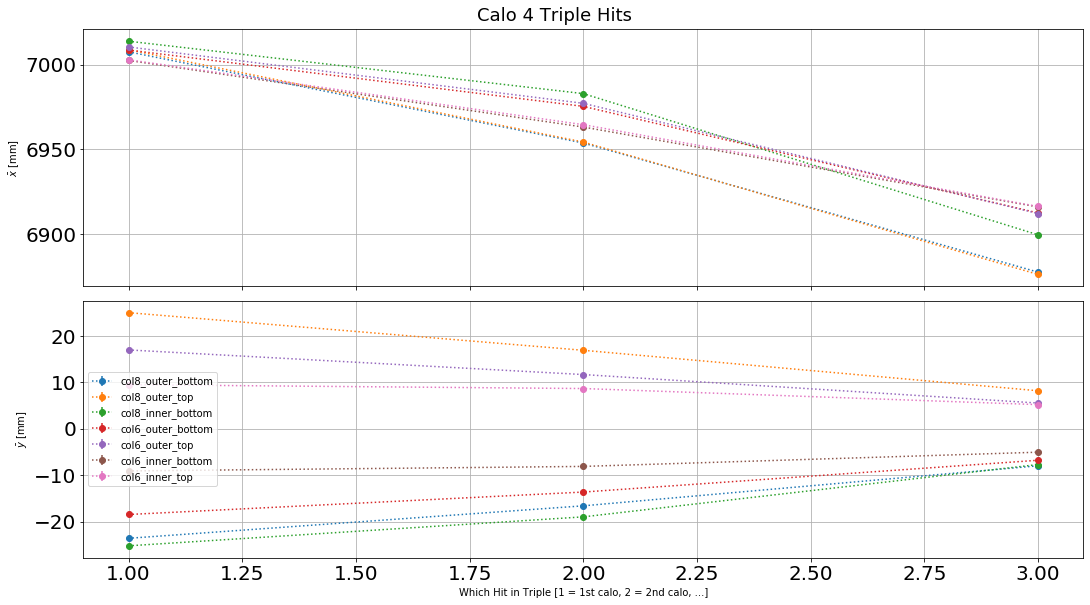

In [8]:
print(means)

fig, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)
for i, meani in enumerate(means):
    xs, xerrs, ys, yerrs = zip(*meani)
    ax[0].errorbar([iiii+1 for iiii in range(len(xs))], xs, yerr=xerrs,label=names[i], fmt="o:")
    ax[1].errorbar([iiii+1 for iiii in range(len(ys))], ys, yerr=yerrs,label=names[i], fmt="o:")
plt.tight_layout()
plt.suptitle("Calo "+str(calo)+" Triple Hits",y=1.02,fontsize=18)
plt.xlabel("Which Hit in Triple [1 = 1st calo, 2 = 2nd calo, ...]")
for axi in ax:
    axi.grid()
ax[0].set_ylabel(r"$\bar{x}$ [mm]")
ax[1].set_ylabel(r"$\bar{y}$ [mm]")
plt.legend()
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


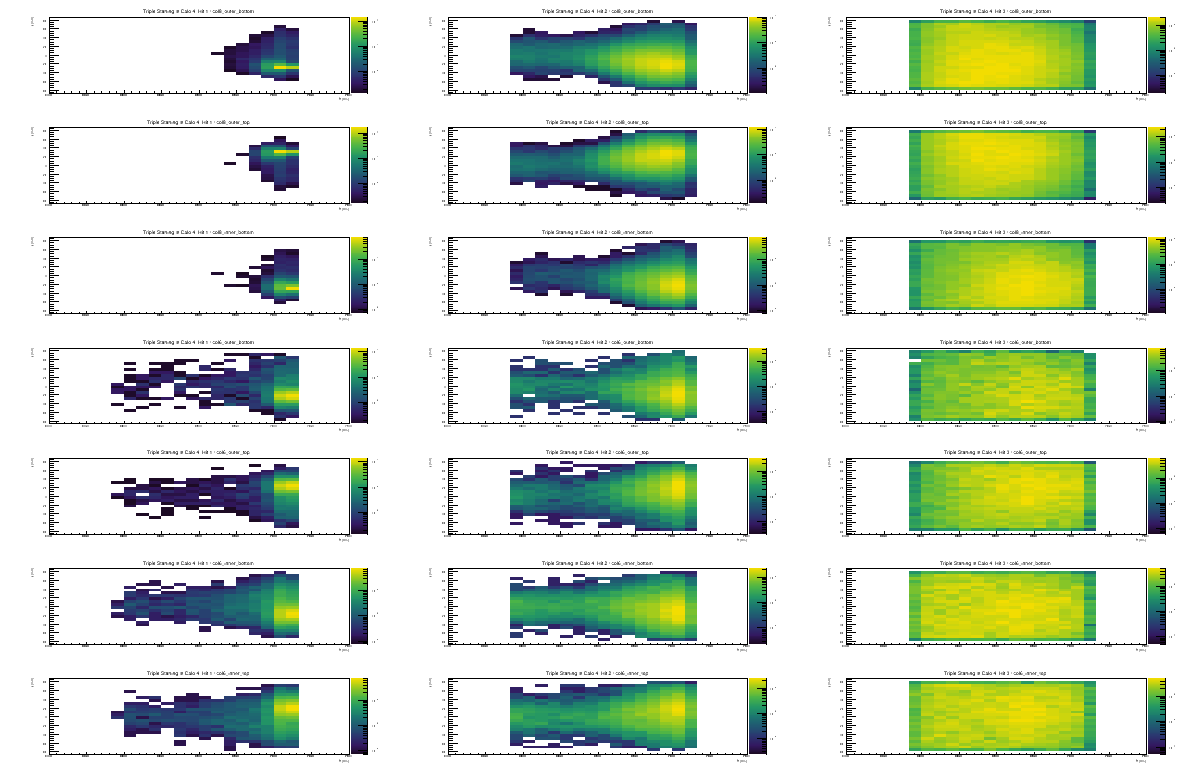

In [9]:
c = r.TCanvas("c","c",1200,800)
c.Divide(3, len(f))
i = 1

means_triple = [[] for i in range(len(f))]

for j, fi in enumerate(f):
    #name = files[j].split("/")[2].split("_pro")[0]
    name = names[j]
    for triple in range(3):
        c.cd(i)
        hi = fi.Get("calo_"+str(calo+triple)+"_tripleHit_"+str(triple+1)).Clone()
        hi.SetTitle("Triple Starting in Calo "+str(calo)+", Hit "+str(triple+1)+" / "+name)
        hi.GetXaxis().SetRangeUser(6700,7100)
        hi.GetYaxis().SetRangeUser(-85,85)
        means_triple[j].append((hi.GetMean(1), hi.GetMean(11), hi.GetMean(2), hi.GetMean(12)))
        hi.DrawCopy("colz")
        r.gPad.SetLogz()
        i += 1
c.Draw()

[[(7007.700460655406, 0.05866908578392873, -23.573384716121403, 0.05235872865368739), (6953.826063637234, 0.135733208680279, -16.583782912839617, 0.06373539286694403), (6877.577653133888, 0.17121892459766622, -7.966231782673396, 0.13627956947180547)], [(7008.934208891761, 0.06151967443394162, 25.0002614778484, 0.04909749698607058), (6954.388738907781, 0.17441726424082055, 16.901415928203388, 0.08039305265010827), (6876.222687340351, 0.20302299442772648, 8.1879915685721, 0.16177440695149076)], [(7013.937107129775, 0.07891974294887832, -25.192906282081736, 0.06280373035475174), (6983.001622419751, 0.13194168119803668, -18.95840218048582, 0.09785665272695908), (6899.6146048175315, 0.22486580857256738, -7.690933957893738, 0.1688080828512604)], [(7008.743556694475, 0.3703612344536564, -18.449253821327144, 0.24773976825124971), (6975.465646353765, 0.5791256988053911, -13.617201309832895, 0.2723891230493695), (6912.527736941999, 0.4759560426920993, -6.773991649061509, 0.33896042420043315)], [

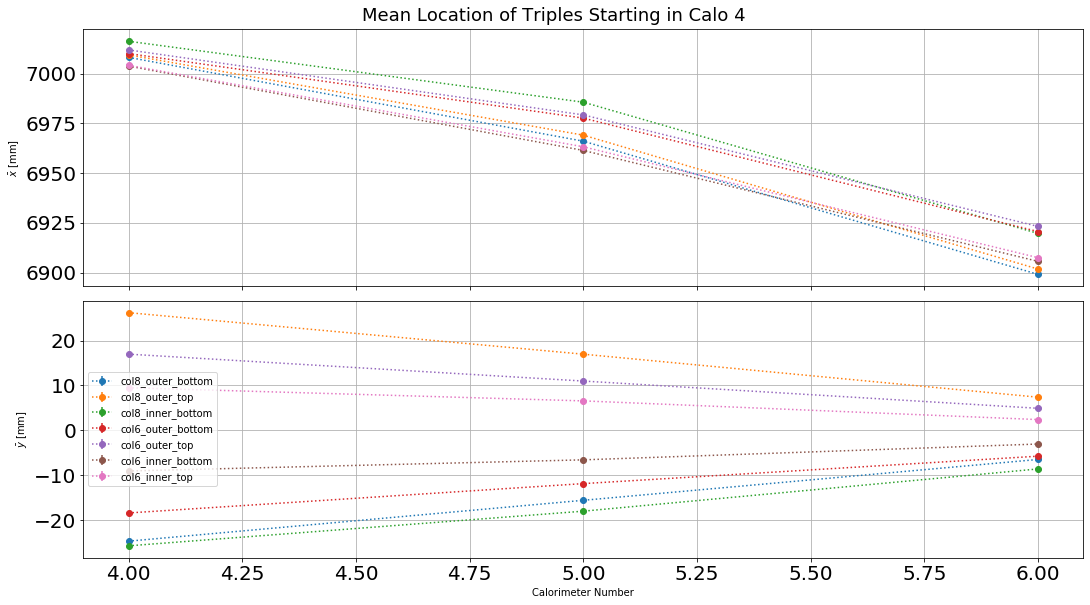

In [10]:
print(means)

fig, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)
for i, meani in enumerate(means_triple):
    xs, xerrs, ys, yerrs = zip(*meani)
    ax[0].errorbar([iiii+calo for iiii in range(len(xs))], xs, yerr=xerrs,label=names[i], fmt="o:")
    ax[1].errorbar([iiii+calo for iiii in range(len(ys))], ys, yerr=yerrs,label=names[i], fmt="o:")
plt.tight_layout()
plt.suptitle("Mean Location of Triples Starting in Calo "+str(calo)+"",y=1.02,fontsize=18)
plt.xlabel("Calorimeter Number")
for axi in ax:
    axi.grid()
ax[0].set_ylabel(r"$\bar{x}$ [mm]")
ax[1].set_ylabel(r"$\bar{y}$ [mm]")
plt.legend()
plt.show()

In [11]:
number_of_triples = [[] for i in range(len(files))]
for i, fi in enumerate(f):
    for j in range(1,25):
        number_of_triples[i].append( fi.Get("calo_"+str(j)+"_tripleHit_"+str(1)).Integral() )
        
#if(True):
if(False):
    for i, x in enumerate(number_of_triples):
        total = np.sum(x)
        for j, xi in enumerate(x):
            number_of_triples[i][j] = number_of_triples[i][j] / total

Integrated number of triples/muon in col8_outer_bottom 	 2.704179e-01
Integrated number of triples/muon in col8_outer_top 	 2.772093e-01
Integrated number of triples/muon in col8_inner_bottom 	 2.755775e-01
Integrated number of triples/muon in col6_outer_bottom 	 2.746762e-01
Integrated number of triples/muon in col6_outer_top 	 2.760784e-01
Integrated number of triples/muon in col6_inner_bottom 	 2.560753e-01
Integrated number of triples/muon in col6_inner_top 	 2.515648e-01


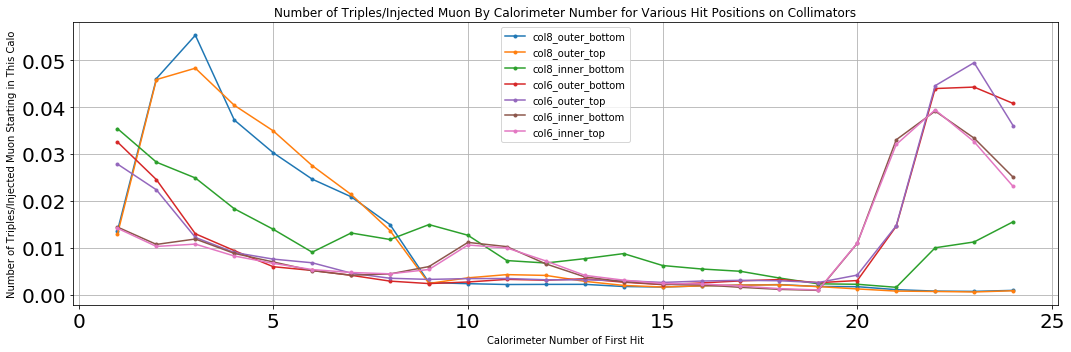

In [13]:
fig,ax = plt.subplots(figsize=(15,5))
for i, tri in enumerate(number_of_triples):
    plt.plot([x+1 for x in range(len(tri))],tri,".-", label=names[i])
    print("Integrated number of triples/muon in", names[i],"\t", "{:e}".format(np.sum(tri)))
if(False):
    alltrips = [np.sum(x) for x in zip(*number_of_triples)]
    plt.plot([x+1 for x in range(len(tri))],alltrips,".-", label="All triples")
plt.title("Number of Triples/Injected Muon By Calorimeter Number for Various Hit Positions on Collimators")
plt.xlabel("Calorimeter Number of First Hit")
plt.ylabel("Number of Triples/Injected Muon Starting in This Calo")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()